<a href="https://colab.research.google.com/github/afif-af/hanson_ml_scikitlearn_tensorflow/blob/main/chapter04handson_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
np.random.seed(42)

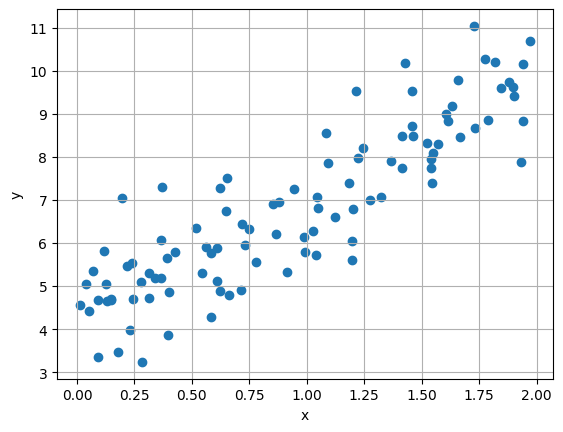

In [4]:
m = 100
x = 2*np.random.rand(m,1)
y = 4 + 3*x + np.random.randn(m,1)

plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [5]:
from sklearn.preprocessing import add_dummy_feature

x_b = add_dummy_feature(x)
theta_best=np.linalg.inv(x_b.T@x_b)@ x_b.T @ y

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
x_new=np.array([[0],[2]])
x_new_b=add_dummy_feature(x_new)
y_predict=x_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

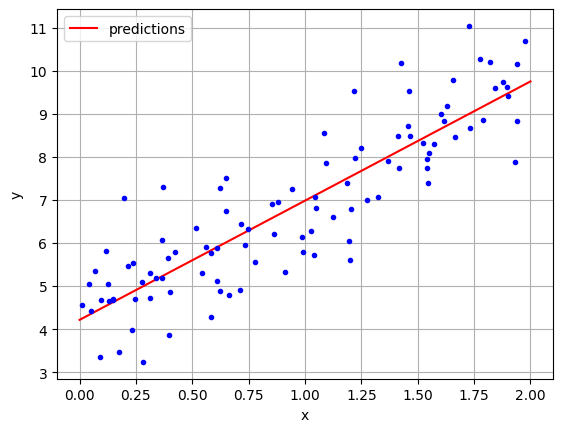

In [8]:
plt.plot(x_new,y_predict,"r-",label="predictions")
plt.plot(x,y,"b.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_


(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(x_new)

array([[4.21509616],
       [9.75532293]])

In [11]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(x_b,y,rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [12]:
np.linalg.pinv(x_b)@ y

array([[4.21509616],
       [2.77011339]])

In [13]:
eta=0.1
n_epochs=1000
m=len(x_b)

In [14]:
np.random.seed(42)
theta=np.random.randn(2,1)

for epoch in range(n_epochs):
  gradients=2/m*x_b.T@(x_b@theta -y)
  theta=theta-eta*gradients

In [15]:
theta

array([[4.21509616],
       [2.77011339]])

#stochastic gradient descent

In [16]:
n_epochs=50
t0, t1=5, 50

def learning_schedule(t):
  return t0/(t+t1)

np.random.seed(42)
theta=np.random.randn(2,1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index=np.random.randint(m)
    xi=x_b[random_index:random_index +1]
    yi=y[random_index:random_index+1]
    gradients=2*xi.T @ (xi@theta -yi) # for SGD, do not divide by m
    eta=learning_schedule(epoch*m+iteration)
    theta=theta-eta*gradients

In [17]:
theta

array([[4.21076011],
       [2.74856079]])

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-5,penalty=None,eta0=0.01,
                     n_iter_no_change=100, random_state=42)
sgd_reg.fit(x,y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

In [21]:
np.random.seed(42)
m=100
x=6*np.random.rand(m,1)-3
y=0.5 * x**2 +x +2 + np.random.randn(m,1)



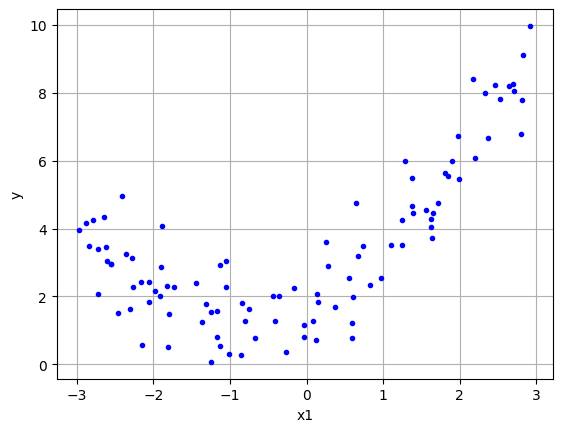

In [22]:
plt.plot(x,y,"b.")
plt.grid()
plt.xlabel("x1")
plt.ylabel("y")
plt.show()